### The purpose of this Jupyter Notebook is to visualize Logistic Regression, K Nearest Neighbors,  Support Vector Machine (SVM)) from this repo

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from matplotlib import rcParams
rcParams['figure.figsize'] = 10, 8

In [10]:
# Load and Clean Data

df = pd.read_csv("exoplanet_data.csv")

# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')

# Drop the null rows
df = df.dropna()


# Set features(X) and target(y) values
X = df.drop("koi_disposition", axis=1)
y = df["koi_disposition"]


## Logistic Regression

Labels: [0 1 0 0 1 1 1 1 0 0]
Data: [[-0.79415228  2.10495117]
 [-9.15155186 -4.81286449]
 [-3.10367371  3.90202401]
 [-1.42946517  5.16850105]
 [-7.4693868  -4.20198333]
 [-9.19585147 -3.90678125]
 [-9.31764266 -4.27315015]
 [-9.20490564 -4.57687928]
 [-2.76017908  5.55121358]
 [-1.17104176  4.33091816]]


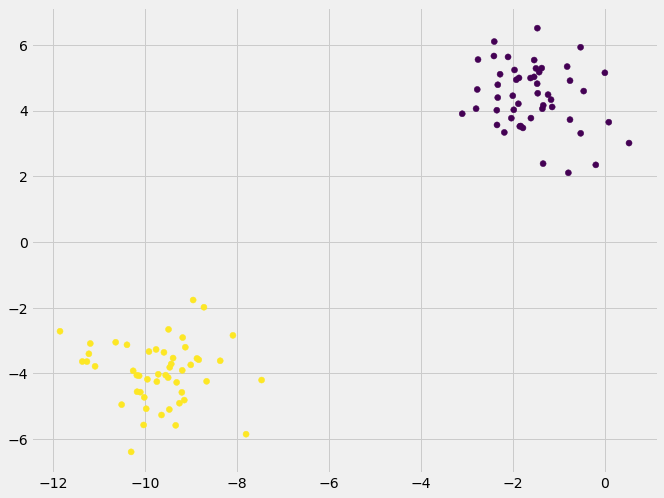

In [6]:
# Refer to Jupyter Notebook titled: "Model-Logistic-Regression.ipynb"

from sklearn.datasets import make_blobs
X, y = make_blobs(centers=2, random_state=1)
print(f"Labels: {y[:10]}")
print(f"Data: {X[:10]}")
plt.scatter(X[:, 0], X[:, 1], c=y)

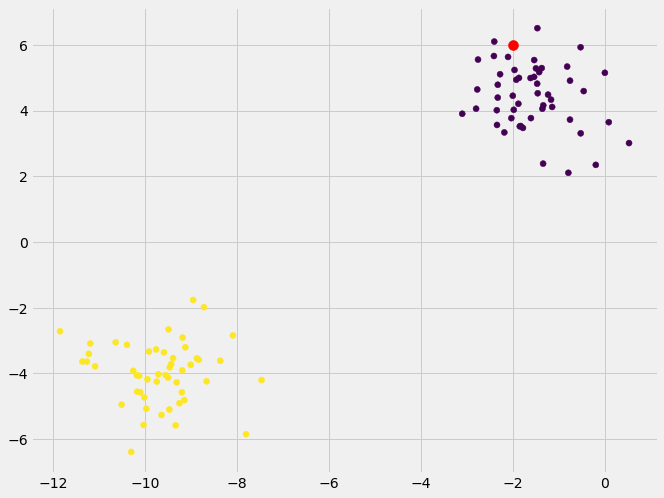

In [7]:
new_data = np.array([[-2, 6]])
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(new_data[0, 0], new_data[0, 1], c="r", marker="o", s=100)

##  K Nearest Neighbors

k: 1, Train/Test Score: 1.000/0.787
k: 3, Train/Test Score: 0.895/0.805
k: 5, Train/Test Score: 0.871/0.811
k: 7, Train/Test Score: 0.862/0.818
k: 9, Train/Test Score: 0.858/0.820
k: 11, Train/Test Score: 0.848/0.830
k: 13, Train/Test Score: 0.848/0.830
k: 15, Train/Test Score: 0.842/0.830
k: 17, Train/Test Score: 0.839/0.830
k: 19, Train/Test Score: 0.836/0.831


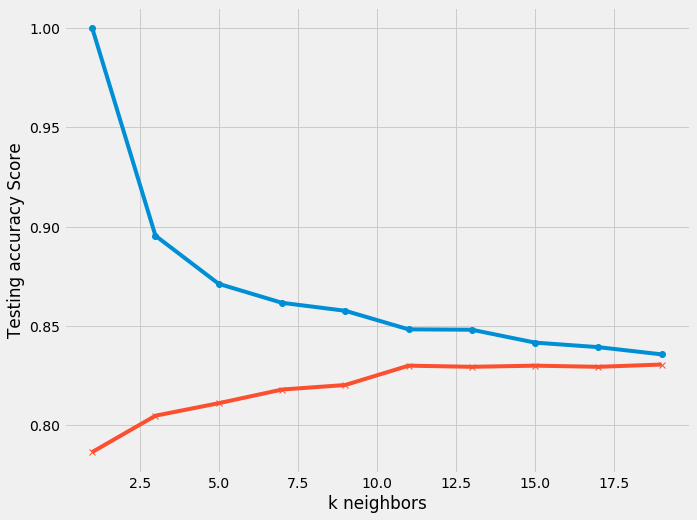

In [9]:
# Refer to Jupyter Notebook titled: "Model-KNN.ipynb"

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train_scaled = label_encoder.transform(y_train)
y_test_scaled = label_encoder.transform(y_test)
from sklearn.neighbors import KNeighborsClassifier
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

##  Support Vector Machine (SVM)

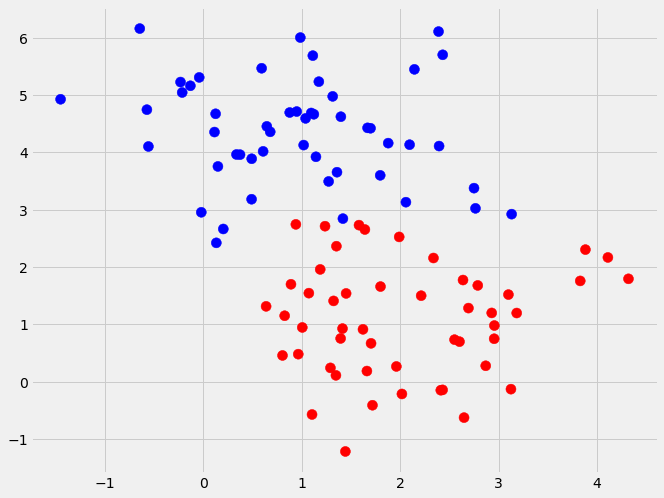

In [11]:
# Refer to Jupyter Notebook titled: "Model-SVM.ipynb"

from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=.95)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap="bwr");
plt.show()

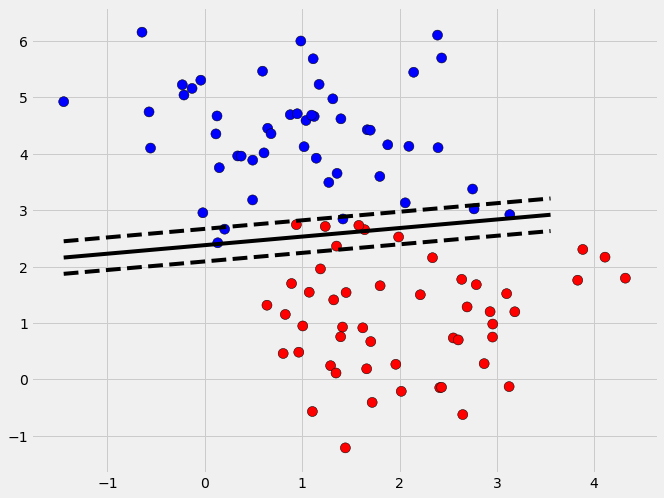

In [12]:
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X, y)
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()
XX, YY = np.mgrid[x_min:x_max, y_min:y_max]
Z = model.decision_function(np.c_[XX.ravel(), YY.ravel()])
Z = Z.reshape(XX.shape)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
            linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', s=100)
plt.show()

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.1s finished
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


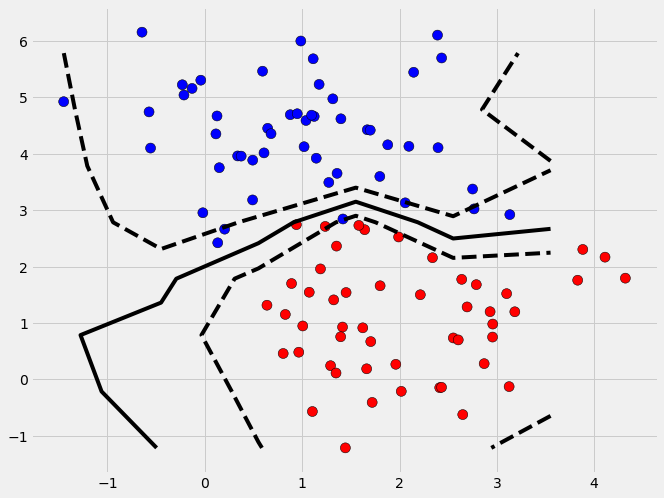

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
from sklearn.svm import SVC 
model2 = SVC(kernel='linear')
model2.fit(X_train_scaled, y_train)
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']} 
grid = GridSearchCV(model2, param_grid, verbose=1)
grid.fit(X_train, y_train)
predictions = grid.predict(X_test)
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()
XX, YY = np.mgrid[x_min:x_max, y_min:y_max]
Z = grid.decision_function(np.c_[XX.ravel(), YY.ravel()])
Z = Z.reshape(XX.shape)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
            linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', s=100)
plt.show()